In [15]:
import pandas
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
import seaborn


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics as metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


warnings.filterwarnings("ignore")

In [16]:
train = pandas.read_csv("Train_data.csv")
test = pandas.read_csv("Test_data.csv")

In [78]:
print(train.head())

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [18]:
print(test.head())

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1   

In [19]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


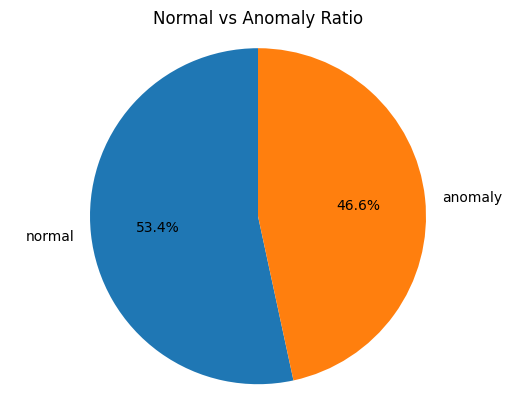

In [20]:
ratio = train['class'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')

plt.title("Normal vs Anomaly Ratio")
plt.show()

In [21]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [22]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [23]:
scaler = StandardScaler()

cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

sc_traindf = pandas.DataFrame(sc_train, columns = cols)
sc_testdf = pandas.DataFrame(sc_test, columns = cols)

In [24]:
encoder = LabelEncoder()

cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

In [25]:
train_x = pandas.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [26]:
test_df = pandas.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 40)

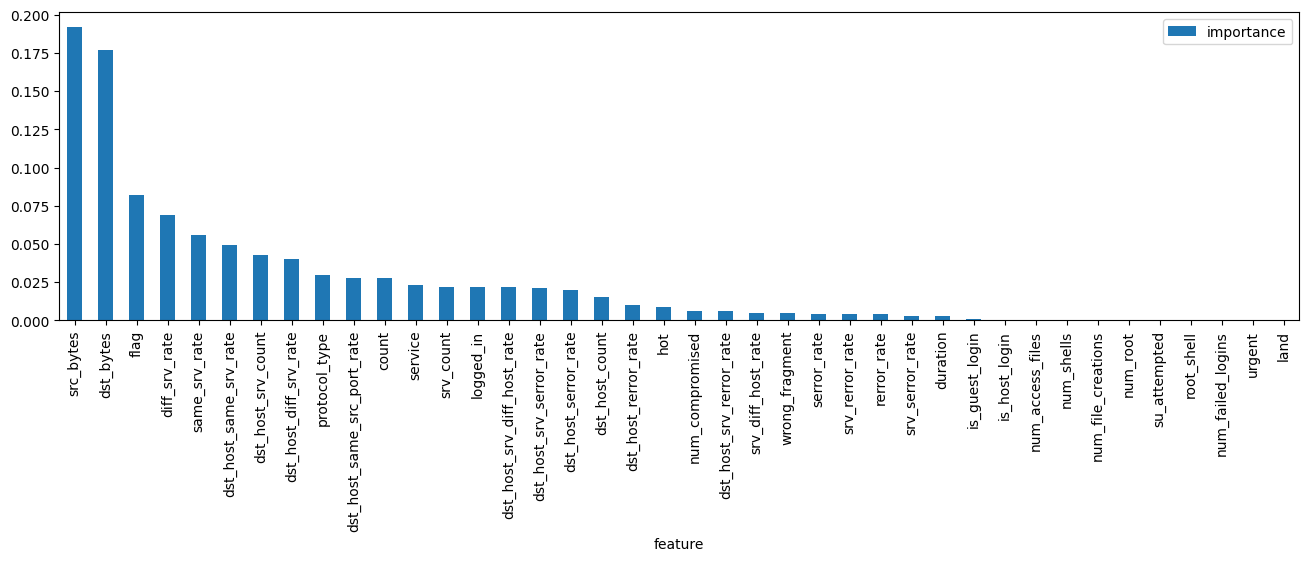

In [27]:
rfc = RandomForestClassifier();

rfc.fit(train_x, train_y);

score = np.round(rfc.feature_importances_,3)
importances = pandas.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (16,4)
importances.plot.bar();

In [28]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

print(selected_features)

['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'protocol_type', 'flag']


<Axes: >

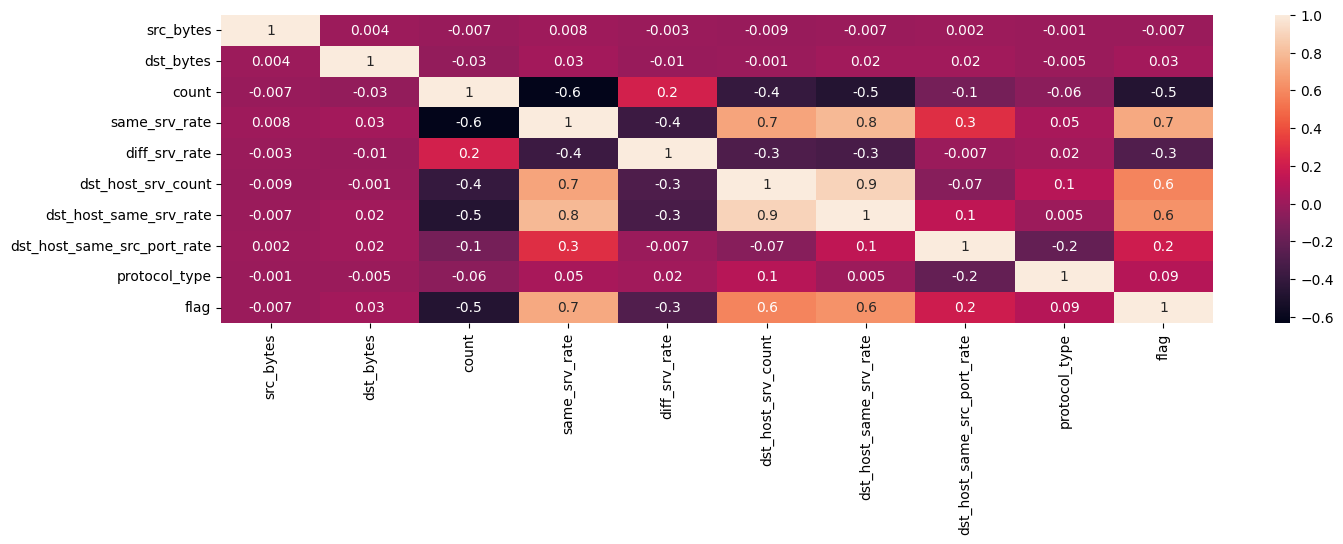

In [29]:
seaborn.heatmap(train_x[selected_features].corr(), annot = True, fmt='.1g')

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.60, random_state=2)

In [31]:
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, Y_train);

In [32]:
scores = cross_val_score(model, X_train, Y_train, cv=10)
accuracy = metrics.accuracy_score(Y_train, model.predict(X_train))
confusion_matrix = metrics.confusion_matrix(Y_train, model.predict(X_train))
classification = metrics.classification_report(Y_train, model.predict(X_train))

print ("Cross Validation Mean Score:" "\n", scores.mean())
print ("Model Accuracy:" "\n", accuracy)
print ("Confusion matrix:" "\n", confusion_matrix)
print ("Classification report:" "\n", classification)

Cross Validation Mean Score:
 0.9910023145959611
Model Accuracy:
 0.9930532583526298
Confusion matrix:
 [[6984   70]
 [  35 8026]]
Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      7054
      normal       0.99      1.00      0.99      8061

    accuracy                           0.99     15115
   macro avg       0.99      0.99      0.99     15115
weighted avg       0.99      0.99      0.99     15115



In [33]:
accuracy_test = metrics.accuracy_score(Y_test, model.predict(X_test))
confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
classification = metrics.classification_report(Y_test, model.predict(X_test))

print ("Model Accuracy:" "\n", accuracy)
print ("Confusion matrix:" "\n", confusion_matrix)
print ("Classification report:" "\n", classification)

Model Accuracy:
 0.9930532583526298
Confusion matrix:
 [[4639   50]
 [  46 5342]]
Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      4689
      normal       0.99      0.99      0.99      5388

    accuracy                           0.99     10077
   macro avg       0.99      0.99      0.99     10077
weighted avg       0.99      0.99      0.99     10077



In [34]:
prediction = model.predict(test_df)
test['KNN_prediction'] = prediction
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.

In [35]:
prediction

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
       'anomaly'], dtype=object)

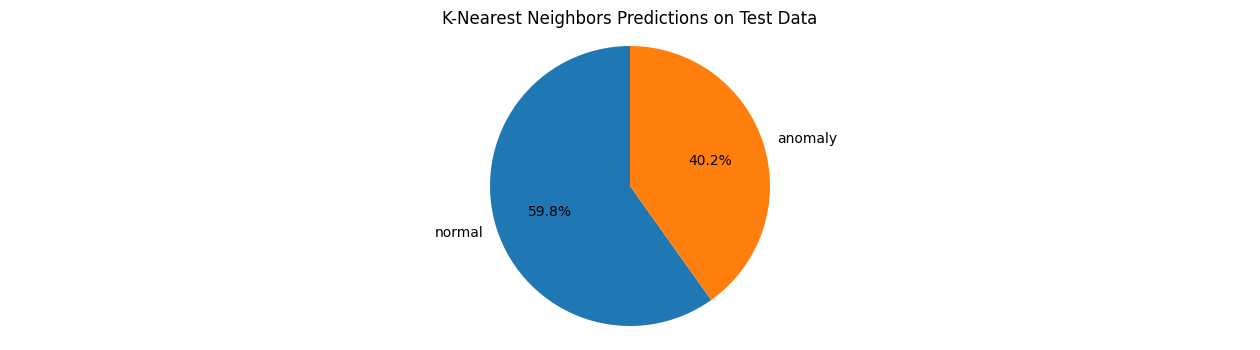

In [66]:
ratio = test['KNN_prediction'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]
ratio_knn = ratio

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')

plt.title("K-Nearest Neighbors Predictions on Test Data")
plt.show()

In [37]:
svm_model = SVC()

In [38]:
svm_model.fit(X_train, Y_train)

SVC()

In [39]:
svm_scores = cross_val_score(svm_model, X_train, Y_train, cv=10)
svm_accuracy = metrics.accuracy_score(Y_train, svm_model.predict(X_train))
svm_confusion_matrix = metrics.confusion_matrix(Y_train, svm_model.predict(X_train))
svm_classification = metrics.classification_report(Y_train, svm_model.predict(X_train))

print("SVM - Cross Validation Mean Score:" "\n", svm_scores.mean())
print("SVM - Model Accuracy:" "\n", svm_accuracy)
print("SVM - Confusion matrix:" "\n", svm_confusion_matrix)
print("SVM - Classification report:" "\n", svm_classification)

SVM - Cross Validation Mean Score:
 0.9621565748882095
SVM - Model Accuracy:
 0.9628183923255045
SVM - Confusion matrix:
 [[6592  462]
 [ 100 7961]]
SVM - Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.93      0.96      7054
      normal       0.95      0.99      0.97      8061

    accuracy                           0.96     15115
   macro avg       0.97      0.96      0.96     15115
weighted avg       0.96      0.96      0.96     15115



In [40]:
svm_accuracy_test = metrics.accuracy_score(Y_test, svm_model.predict(X_test))
svm_confusion_matrix_test = metrics.confusion_matrix(Y_test, svm_model.predict(X_test))
svm_classification_test = metrics.classification_report(Y_test, svm_model.predict(X_test))

print("SVM - Model Accuracy (Test Set):" "\n", svm_accuracy_test)
print("SVM - Confusion matrix (Test Set):" "\n", svm_confusion_matrix_test)
print("SVM - Classification report (Test Set):" "\n", svm_classification_test)

SVM - Model Accuracy (Test Set):
 0.9616949488935199
SVM - Confusion matrix (Test Set):
 [[4366  323]
 [  63 5325]]
SVM - Classification report (Test Set):
               precision    recall  f1-score   support

     anomaly       0.99      0.93      0.96      4689
      normal       0.94      0.99      0.97      5388

    accuracy                           0.96     10077
   macro avg       0.96      0.96      0.96     10077
weighted avg       0.96      0.96      0.96     10077



In [41]:
svm_prediction = svm_model.predict(test_df)
test['svm_prediction'] = svm_prediction
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2       

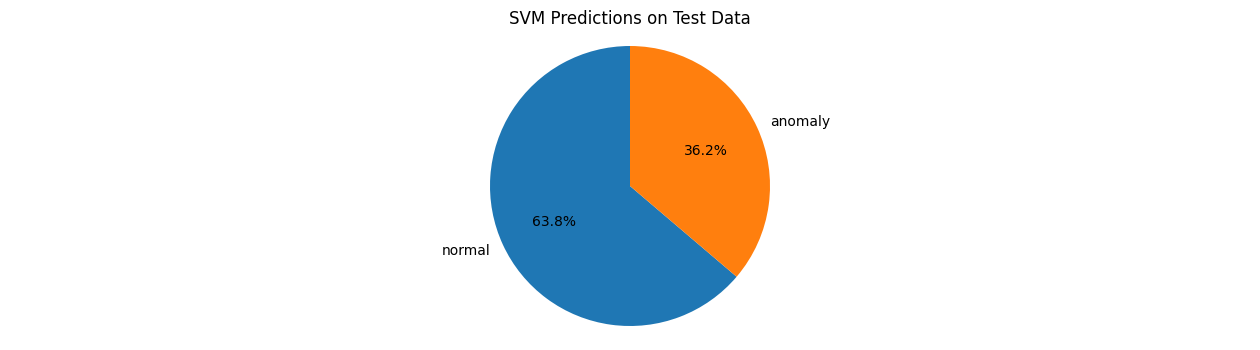

In [42]:
ratio_svm = test['svm_prediction'].value_counts()
labels_svm = ratio_svm.index[0], ratio_svm.index[1]
sizes_svm = [ratio_svm.values[0], ratio_svm.values[1]]

figure_svm, axis_svm = plt.subplots()
axis_svm.pie(sizes_svm, labels=labels_svm, autopct='%1.1f%%', startangle=90)
axis_svm.axis('equal')
plt.title("SVM Predictions on Test Data")
plt.show()

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, train_size=0.60, random_state=2)

In [44]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [45]:
nb_scores = cross_val_score(nb_model, X_train, Y_train, cv=10)
nb_accuracy = metrics.accuracy_score(Y_train, nb_model.predict(X_train))
nb_confusion_matrix = metrics.confusion_matrix(Y_train, nb_model.predict(X_train))
nb_classification = metrics.classification_report(Y_train, nb_model.predict(X_train))

print("Naive Bayes - Cross Validation Mean Score:" "\n", nb_scores.mean())
print("Naive Bayes - Model Accuracy:" "\n", nb_accuracy)
print("Naive Bayes - Confusion matrix:" "\n", nb_confusion_matrix)
print("Naive Bayes - Classification report:" "\n", nb_classification)

Naive Bayes - Cross Validation Mean Score:
 0.8922923254160844
Naive Bayes - Model Accuracy:
 0.8948064836255375
Naive Bayes - Confusion matrix:
 [[6454  600]
 [ 990 7071]]
Naive Bayes - Classification report:
               precision    recall  f1-score   support

     anomaly       0.87      0.91      0.89      7054
      normal       0.92      0.88      0.90      8061

    accuracy                           0.89     15115
   macro avg       0.89      0.90      0.89     15115
weighted avg       0.90      0.89      0.89     15115



In [46]:
nb_accuracy_test = metrics.accuracy_score(Y_test, nb_model.predict(X_test))
nb_confusion_matrix_test = metrics.confusion_matrix(Y_test, nb_model.predict(X_test))
nb_classification_test = metrics.classification_report(Y_test, nb_model.predict(X_test))

print("Naive Bayes - Model Accuracy (Test Set):" "\n", nb_accuracy_test)
print("Naive Bayes - Confusion matrix (Test Set):" "\n", nb_confusion_matrix_test)
print("Naive Bayes - Classification report (Test Set):" "\n", nb_classification_test)

Naive Bayes - Model Accuracy (Test Set):
 0.8936191326783764
Naive Bayes - Confusion matrix (Test Set):
 [[4294  395]
 [ 677 4711]]
Naive Bayes - Classification report (Test Set):
               precision    recall  f1-score   support

     anomaly       0.86      0.92      0.89      4689
      normal       0.92      0.87      0.90      5388

    accuracy                           0.89     10077
   macro avg       0.89      0.90      0.89     10077
weighted avg       0.90      0.89      0.89     10077



In [47]:
nb_prediction = nb_model.predict(test_df)
test['nb_prediction'] = nb_prediction
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.06   
1               0       0    0  ...                    0.06   
2               0       0    0  ...                    0.04   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0

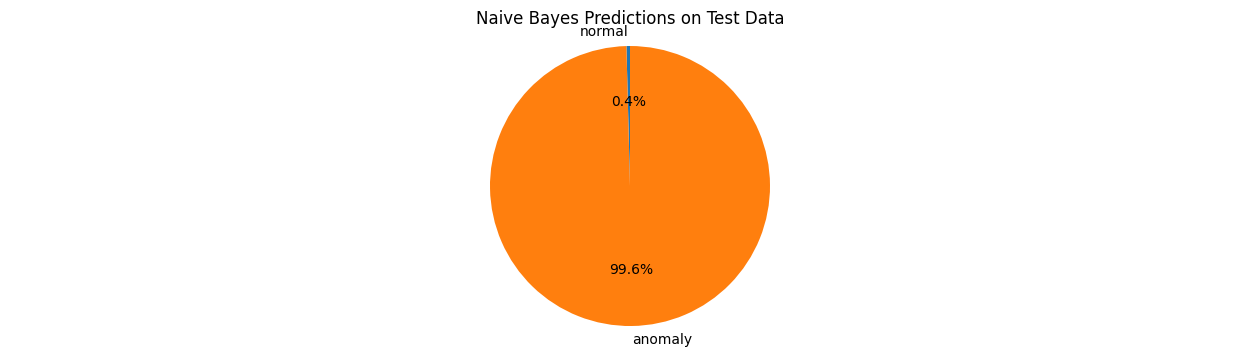

In [76]:
ratio_nb = test['nb_prediction'].value_counts()
labels_nb = ratio_nb.index[1], ratio_nb.index[0]
sizes_nb = [ratio_nb.values[1], ratio_nb.values[0]]

figure_nb, axis_nb = plt.subplots()
axis_nb.pie(sizes_nb, labels=labels_nb, autopct='%1.1f%%', startangle=90)
axis_nb.axis('equal')
plt.title("Naive Bayes Predictions on Test Data")
plt.show()

In [49]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [50]:
lr_scores = cross_val_score(lr_model, X_train, Y_train, cv=10)
lr_accuracy = metrics.accuracy_score(Y_train, lr_model.predict(X_train))
lr_confusion_matrix = metrics.confusion_matrix(Y_train, lr_model.predict(X_train))
lr_classification = metrics.classification_report(Y_train, lr_model.predict(X_train))

print("Logistic Regression - Cross Validation Mean Score:" "\n", lr_scores.mean())
print("Logistic Regression - Model Accuracy:" "\n", lr_accuracy)
print("Logistic Regression - Confusion matrix:" "\n", lr_confusion_matrix)
print("Logistic Regression - Classification report:" "\n", lr_classification)

Logistic Regression - Cross Validation Mean Score:
 0.9543496282989995
Logistic Regression - Model Accuracy:
 0.9552762156797883
Logistic Regression - Confusion matrix:
 [[6648  406]
 [ 270 7791]]
Logistic Regression - Classification report:
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      7054
      normal       0.95      0.97      0.96      8061

    accuracy                           0.96     15115
   macro avg       0.96      0.95      0.96     15115
weighted avg       0.96      0.96      0.96     15115



In [51]:
lr_accuracy_test = metrics.accuracy_score(Y_test, lr_model.predict(X_test))
lr_confusion_matrix_test = metrics.confusion_matrix(Y_test, lr_model.predict(X_test))
lr_classification_test = metrics.classification_report(Y_test, lr_model.predict(X_test))

print("Logistic Regression - Model Accuracy (Test Set):" "\n", lr_accuracy_test)
print("Logistic Regression - Confusion matrix (Test Set):" "\n", lr_confusion_matrix_test)
print("Logistic Regression - Classification report (Test Set):" "\n", lr_classification_test)

Logistic Regression - Model Accuracy (Test Set):
 0.9556415599880917
Logistic Regression - Confusion matrix (Test Set):
 [[4403  286]
 [ 161 5227]]
Logistic Regression - Classification report (Test Set):
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      4689
      normal       0.95      0.97      0.96      5388

    accuracy                           0.96     10077
   macro avg       0.96      0.95      0.96     10077
weighted avg       0.96      0.96      0.96     10077



In [52]:
lr_prediction = lr_model.predict(test_df)
test['lr_prediction'] = lr_prediction
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0               0       0    0  ...                         0.00   
1               0       0    0  ...                         0.00   
2               0       0    0  ...                         0.61   
3               0       0    0  ...                         1.00   
4               0       0    0  ...                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00          

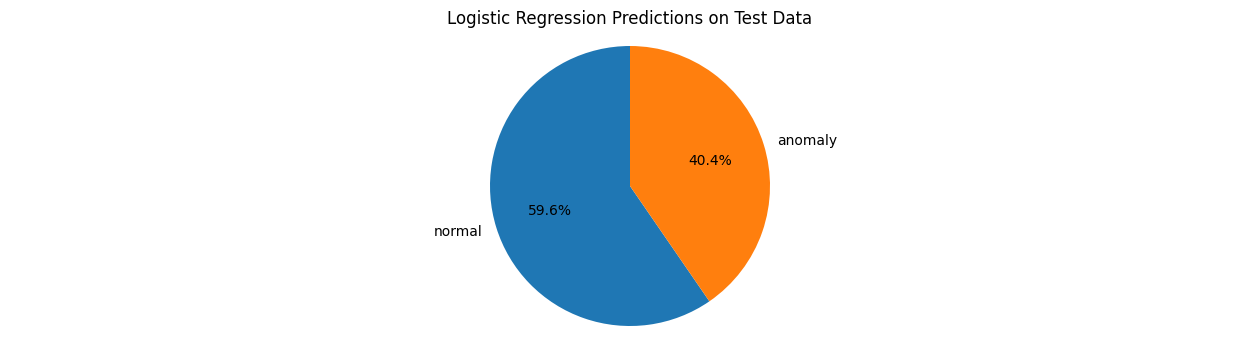

In [53]:
ratio_lr = test['lr_prediction'].value_counts()
labels_lr = ratio_lr.index[0], ratio_lr.index[1]
sizes_lr = [ratio_lr.values[0], ratio_lr.values[1]]

figure_lr, axis_lr = plt.subplots()
axis_lr.pie(sizes_lr, labels=labels_lr, autopct='%1.1f%%', startangle=90)
axis_lr.axis('equal')
plt.title("Logistic Regression Predictions on Test Data")
plt.show()

In [54]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [55]:
gb_scores = cross_val_score(gb_model, X_train, Y_train, cv=10)
gb_accuracy = metrics.accuracy_score(Y_train, gb_model.predict(X_train))
gb_confusion_matrix = metrics.confusion_matrix(Y_train, gb_model.predict(X_train))
gb_classification = metrics.classification_report(Y_train, gb_model.predict(X_train))

print("Gradient Boosting - Cross Validation Mean Score:" "\n", gb_scores.mean())
print("Gradient Boosting - Model Accuracy:" "\n", gb_accuracy)
print("Gradient Boosting - Confusion matrix:" "\n", gb_confusion_matrix)
print("Gradient Boosting - Classification report:" "\n", gb_classification)


Gradient Boosting - Cross Validation Mean Score:
 0.9948392563878997
Gradient Boosting - Model Accuracy:
 0.9967581872312272
Gradient Boosting - Confusion matrix:
 [[7028   26]
 [  23 8038]]
Gradient Boosting - Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      7054
      normal       1.00      1.00      1.00      8061

    accuracy                           1.00     15115
   macro avg       1.00      1.00      1.00     15115
weighted avg       1.00      1.00      1.00     15115



In [56]:
gb_accuracy_test = metrics.accuracy_score(Y_test, gb_model.predict(X_test))
gb_confusion_matrix_test = metrics.confusion_matrix(Y_test, gb_model.predict(X_test))
gb_classification_test = metrics.classification_report(Y_test, gb_model.predict(X_test))

print("Gradient Boosting - Model Accuracy (Test Set):" "\n", gb_accuracy_test)
print("Gradient Boosting - Confusion matrix (Test Set):" "\n", gb_confusion_matrix_test)
print("Gradient Boosting - Classification report (Test Set):" "\n", gb_classification_test)

Gradient Boosting - Model Accuracy (Test Set):
 0.9946412622804406
Gradient Boosting - Confusion matrix (Test Set):
 [[4668   21]
 [  33 5355]]
Gradient Boosting - Classification report (Test Set):
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      4689
      normal       1.00      0.99      0.99      5388

    accuracy                           0.99     10077
   macro avg       0.99      0.99      0.99     10077
weighted avg       0.99      0.99      0.99     10077



In [57]:
gb_prediction = gb_model.predict(test_df)
test['gb_prediction'] = gb_prediction
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0               0       0    0  ...                         0.00   
1               0       0    0  ...                         0.00   
2               0       0    0  ...                         0.02   
3               0       0    0  ...                         0.28   
4               0       0    0  ...                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1 

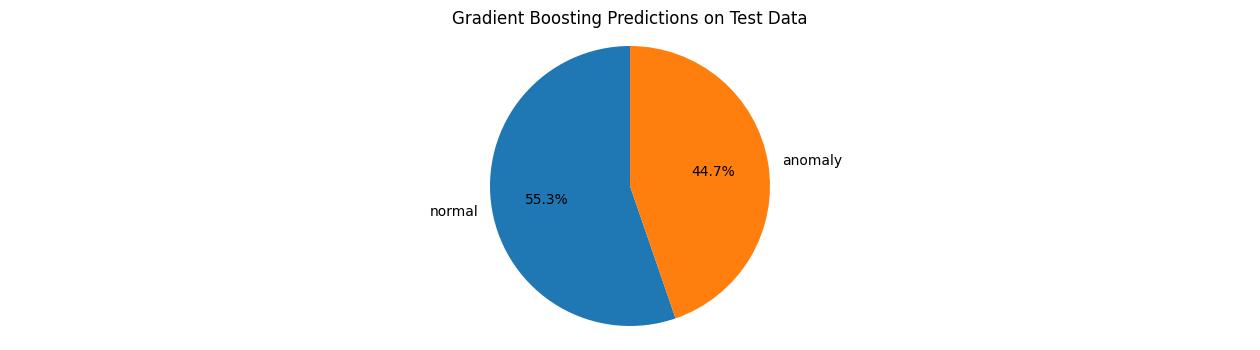

In [74]:
ratio_gb = test['gb_prediction'].value_counts()
labels_gb = ratio_gb.index[1], ratio_gb.index[0]
sizes_gb = [ratio_gb.values[0], ratio_gb.values[1]]

figure_gb, axis_gb = plt.subplots()
axis_gb.pie(sizes_gb, labels=labels_gb, autopct='%1.1f%%', startangle=90)
axis_gb.axis('equal')
plt.title("Gradient Boosting Predictions on Test Data")
plt.show()

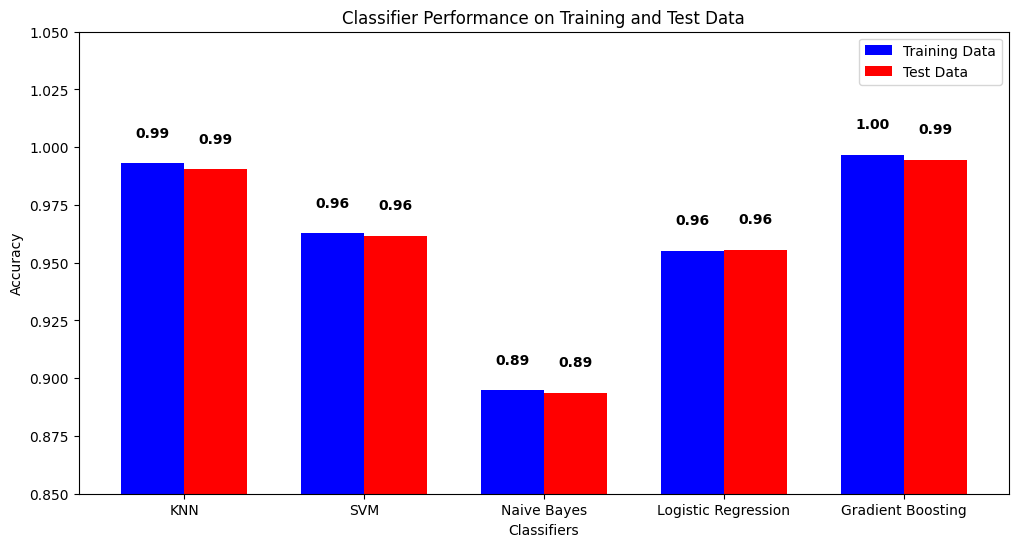

In [59]:
classifiers = ['KNN', 'SVM', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting']
train_accuracies = [accuracy, svm_accuracy, nb_accuracy, lr_accuracy, gb_accuracy]
test_accuracies = [accuracy_test, svm_accuracy_test, nb_accuracy_test, lr_accuracy_test, gb_accuracy_test]

bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(classifiers)), train_accuracies, bar_width, color='blue', label='Training Data')
plt.bar(np.arange(len(classifiers)) + bar_width, test_accuracies, bar_width, color='red', label='Test Data')
plt.xticks(np.arange(len(classifiers)) + bar_width / 2, classifiers)
plt.ylim(0.85, 1.05, 0.2)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Training and Test Data')
plt.legend()

for i, train_acc, test_acc in zip(np.arange(len(classifiers)), train_accuracies, test_accuracies):
    plt.text(i, train_acc + 0.01, f'{train_acc:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
    plt.text(i + bar_width, test_acc + 0.01, f'{test_acc:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()